<h2> Implementation of Extended Difference of Guassian (XDoG) </h2>

Dσ,k,τ(x) = Gσ(x) − τ · Gkσ(x) <br>
and then we use a thresholding function on the dog output <br>
Made the thresholding function separate so that we can change it independently of the DoG function<br>
<b>INPUT SHOULD BE GREYSCALE</b>


In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def dog(img,k,sigma,T,size=(0,0)):
    img1 = cv2.GaussianBlur(img,size,sigma)
    img2 = cv2.GaussianBlur(img,size,sigma*k)

    return (img1-T*img2)

def thresholding_2T(img,epsilon,phi):
    (h,w) = img.shape[0:2]
    img = img/255 #normalise the image because epsilon will be normalised

    for i in range(h):
        for j in range(w):
            if(img[i,j] >= epsilon):
                img[i,j] = 1
            else:
                # img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
                img[i,j] = 0
    #multiply by 255 again
    img = img * 255
    return img

def thresholding_grad(img,epsilon,phi):
    (h,w) = img.shape[0:2]
    img = img/255 #normalise the image because epsilon will be normalised

    for i in range(h):
        for j in range(w):
            if(img[i,j] >= epsilon):
                img[i,j] = 1
            else:
                img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))

    #multiply by 255 again
    img = img * 255
    return img



def thresholding_3T(img,epsilon,phi):
    (h,w) = img.shape[0:2]
    img = img/255 #normalise the image because epsilon will be normalised
    n = 3
    for i in range(h):
        for j in range(w):
            img[i,j] = (math.floor((img[i,j]*(n-1)) + 0.5))/(n-1)

            # if (img[i,j]>=epsilon):
            #     img[i,j] = 1
            # else:
            #     # img[i,j] = 0
            #     img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))

            # if(img[i,j] >= epsilon):
            #     img[i,j] = 1
            # elif img[i,j] < epsilon and img[i,j]>=0.7374:
            #     # img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
            #     img[i,j] = 0.585
            #     # img[i,j] = (math.floor((img[i,j]*(3-1)) + 0.5))/(3-1)
            # elif img[i,j]<0.43:
            #     # img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
            #     img[i,j] = 0


            # if(img[i,j] >= epsilon):
            #     img[i,j] = 1
            # elif img[i,j] < epsilon and img[i,j]>=0.68374:
            #     # img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
            #     img[i,j] = 0.705
            #     # img[i,j] = (math.floor((img[i,j]*(3-1)) + 0.5))/(3-1)
            # elif img[i,j]< 0.68374 and img[i,j]>=0.33:
            #     img[i,j] = 0.437
            # elif img[i,j]<0.33:
            #     # img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
            #     img[i,j] = 0

    #multiply by 255 again
    img = img * 255
    return img


def thresholding_4T(img,epsilon,phi):
    (h,w) = img.shape[0:2]
    img = img/255 #normalise the image because epsilon will be normalised
    n = 3
    for i in range(h):
        for j in range(w):
            # img[i,j] = (math.floor((img[i,j]*(n-1)) + 0.5))/(n-1)

            # if (img[i,j]>=epsilon):
            #     img[i,j] = 1
            # else:
            #     # img[i,j] = 0
            #     img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))

            # if(img[i,j] >= epsilon):
            #     img[i,j] = 1
            # elif img[i,j] < epsilon and img[i,j]>=0.7374:
            #     # img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
            #     img[i,j] = 0.45
            #     # img[i,j] = (math.floor((img[i,j]*(3-1)) + 0.5))/(3-1)
            # elif img[i,j]<0.43:
            #     # img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
            #     img[i,j] = 0


            if(img[i,j] >= epsilon):
                img[i,j] = 1
            elif img[i,j] < epsilon and img[i,j]>=0.78374:
                # img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
                img[i,j] = 0.755
                # img[i,j] = (math.floor((img[i,j]*(3-1)) + 0.5))/(3-1)
            elif img[i,j]< 0.78374 and img[i,j]>=0.33:
                img[i,j] = 0.5537
            elif img[i,j]<0.33:
                # img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
                img[i,j] = 0

    #multiply by 255 again
    img = img * 255
    return img


def xdog(img,k,sigma,T,epsilon,phi):
    dimg = dog(img,k,sigma,T)
    (h,w) = dimg.shape[0:2]

    thresh = thresholding_3T(dimg,epsilon,phi)
    thresh = (np.stack((thresh,thresh,thresh),axis=2)).astype(np.uint8) #stacking the channels together
    return thresh

def sharpening(img,sigma,k,p):
    size = (0,0)
    res = ((1+p) * (cv2.GaussianBlur(img,size,sigma))) - (p*cv2.GaussianBlur(img,size,k*sigma))
    return res

def thresh_sharpened(img,k,sigma,p,epsilon, phi):
    dimg = sharpening(img,sigma,k,p)
    (h,w) = dimg.shape[0:2]

    thresh = thresholding_3T(dimg,epsilon, phi)
    thresh = (np.stack((thresh,thresh,thresh),axis=2)).astype(np.uint8) #stacking the channels together
    return thresh

In [89]:
# img = cv2.imread("/content/tess.jpeg")
# plt.figure()
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # plt.imshow(img)
# # plt.title("Original Image")

# img_gr = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# result = thresh_sharpened(img_gr,100,0.48,15.7,0.49,78.3)
# r2 = thresh_sharpened(img_gr,100,0.9,15.7,0.7,78.3)
# r3 = thresh_sharpened(img_gr,100,0.2,15.7,0.7,78.3)
# # plt.figure()
# # plt.imshow(result,cmap='gray')
# # plt.axis('off')
# # plt.title("XDoG output")
# sh1 = sharpening(img_gr,0.2,100,20)

# fig,ax = plt.subplots(1,5, figsize=(30,20))
# ax[0].imshow(img)
# ax[0].axis('off')
# ax[0].set_title('Original Image')
# ax[1].imshow(r3)
# ax[1].axis('off')
# ax[1].set_title('Image 1')
# ax[2].imshow(result)
# ax[2].axis('off')
# ax[2].set_title('Image 2')
# ax[3].imshow(r2)
# ax[3].axis('off')
# ax[3].set_title('Image 3')
# ax[4].imshow(sh1,cmap='gray')
# ax[4].set_title('Sharpended Image')
# ax[4].axis('off')

#Gradient Thresholding

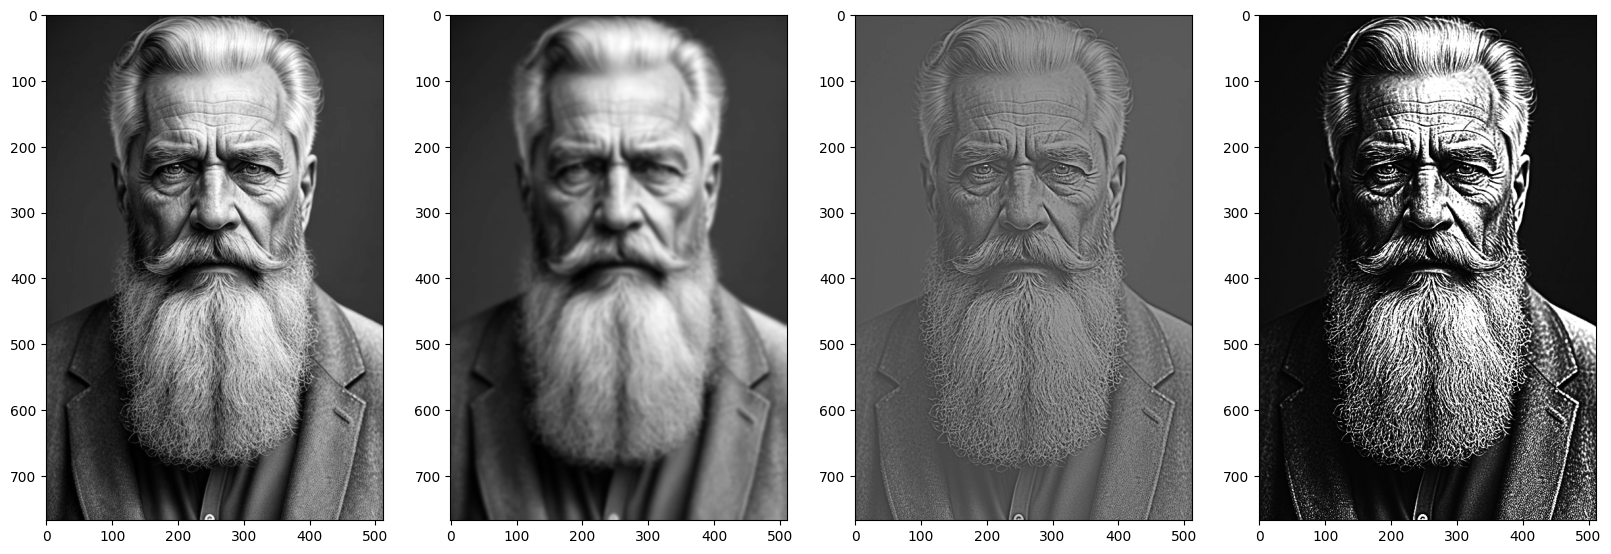

In [108]:
img = cv2.imread("/content/tess.jpeg")
img_gr = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sigma = 0.5
k=5
p=2.5
epsilon = 0.88
phi = 2.5

ib1 = cv2.GaussianBlur(img_gr,(0,0),sigma)
ib2 = cv2.GaussianBlur(img_gr,(0,0),sigma*k)
isb = ((1+p)*ib1) - p*ib2
(h,w) = isb.shape[0:2]

thresh00 = thresholding_grad(isb,epsilon, phi)
thresh00 = (np.stack((thresh00,thresh00,thresh00),axis=2)).astype(np.uint8) #stacking the channels together


fig,ax = plt.subplots(1,4,figsize=(20,15))
ax[0].imshow(ib1, cmap = 'gray')
ax[1].imshow(ib2,cmap='gray')
ax[2].imshow(isb,cmap='gray')
ax[3].imshow(thresh00)

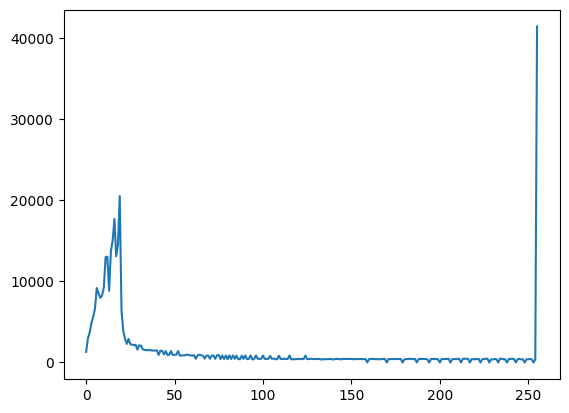

In [109]:
histr00 = cv2.calcHist([thresh00],[0],None,[256],[0,256])
plt.plot(histr00)

#2-tone Thresholding

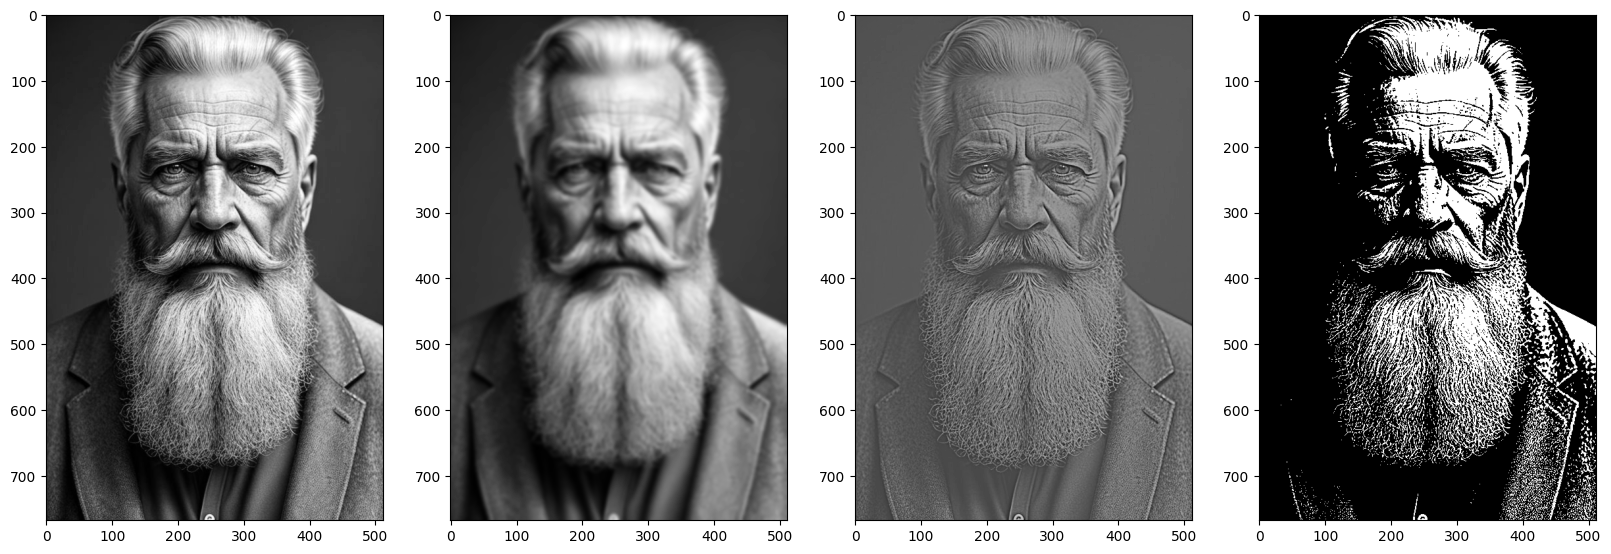

In [105]:
img = cv2.imread("/content/tess.jpeg")
img_gr = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sigma = 0.5
k=5
p=2.5
epsilon = 0.62
phi = 2.5

ib1 = cv2.GaussianBlur(img_gr,(0,0),sigma)
ib2 = cv2.GaussianBlur(img_gr,(0,0),sigma*k)
isb = ((1+p)*ib1) - p*ib2
(h,w) = isb.shape[0:2]

thresh0 = thresholding_2T(isb,epsilon, phi)
thresh0 = (np.stack((thresh0,thresh0,thresh0),axis=2)).astype(np.uint8) #stacking the channels together


fig,ax = plt.subplots(1,4,figsize=(20,15))
ax[0].imshow(ib1, cmap = 'gray')
ax[1].imshow(ib2,cmap='gray')
ax[2].imshow(isb,cmap='gray')
ax[3].imshow(thresh0)

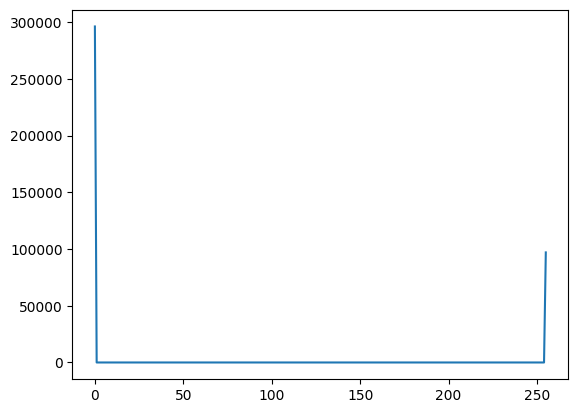

In [110]:
histr0 = cv2.calcHist([thresh0],[0],None,[256],[0,256])
plt.plot(histr0)

#3-tone Thresholding

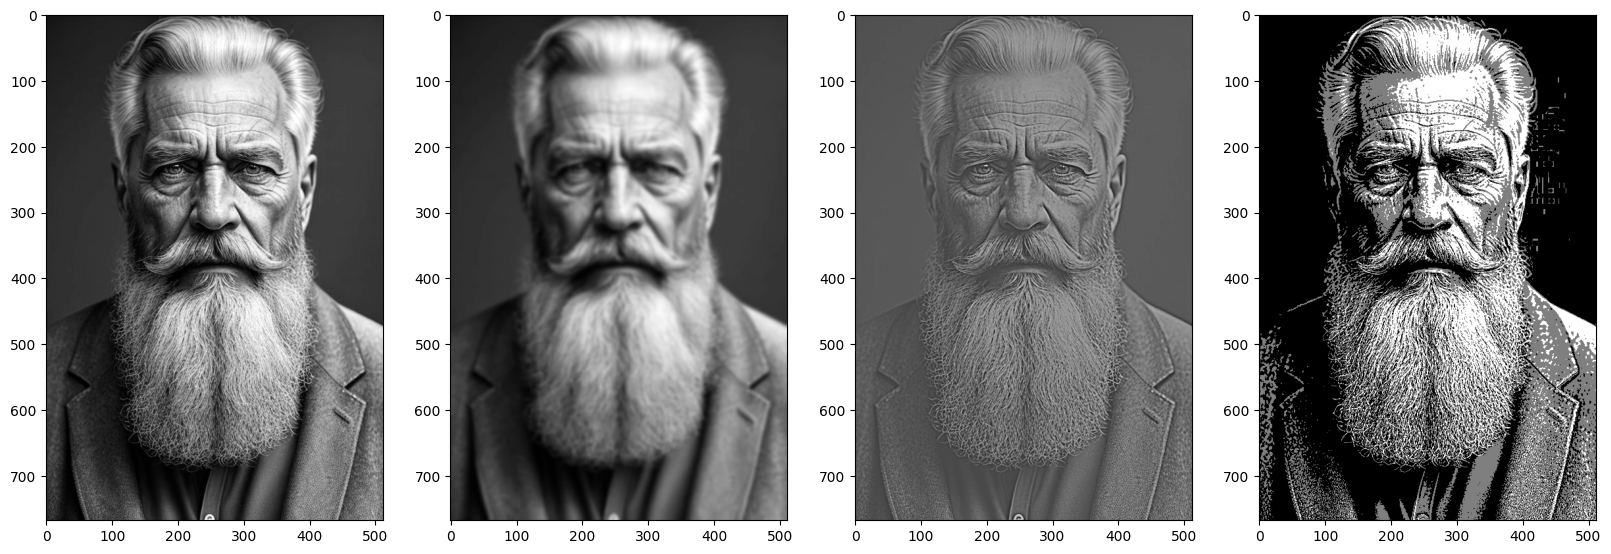

In [95]:
img = cv2.imread("/content/tess.jpeg")
img_gr = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sigma = 0.5
k=5
p=2.5
epsilon = 0.88
phi = 2.5

ib1 = cv2.GaussianBlur(img_gr,(0,0),sigma)
ib2 = cv2.GaussianBlur(img_gr,(0,0),sigma*k)
isb = ((1+p)*ib1) - p*ib2
(h,w) = isb.shape[0:2]

thresh = thresholding_3T(isb,epsilon, phi)
thresh = (np.stack((thresh,thresh,thresh),axis=2)).astype(np.uint8) #stacking the channels together


fig,ax = plt.subplots(1,4,figsize=(20,15))
ax[0].imshow(ib1, cmap = 'gray')
ax[1].imshow(ib2,cmap='gray')
ax[2].imshow(isb,cmap='gray')
ax[3].imshow(thresh)

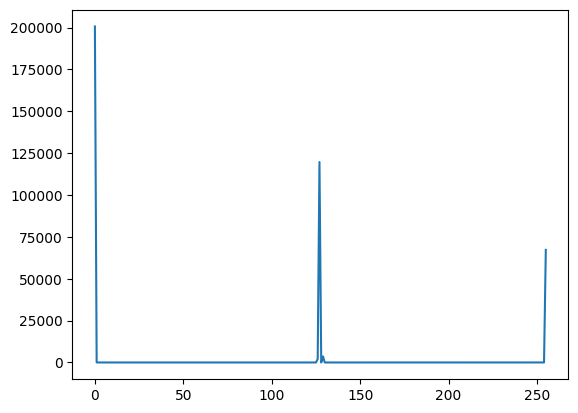

In [96]:
histr = cv2.calcHist([thresh],[0],None,[256],[0,256])
plt.plot(histr)

#4-tone Thresholding

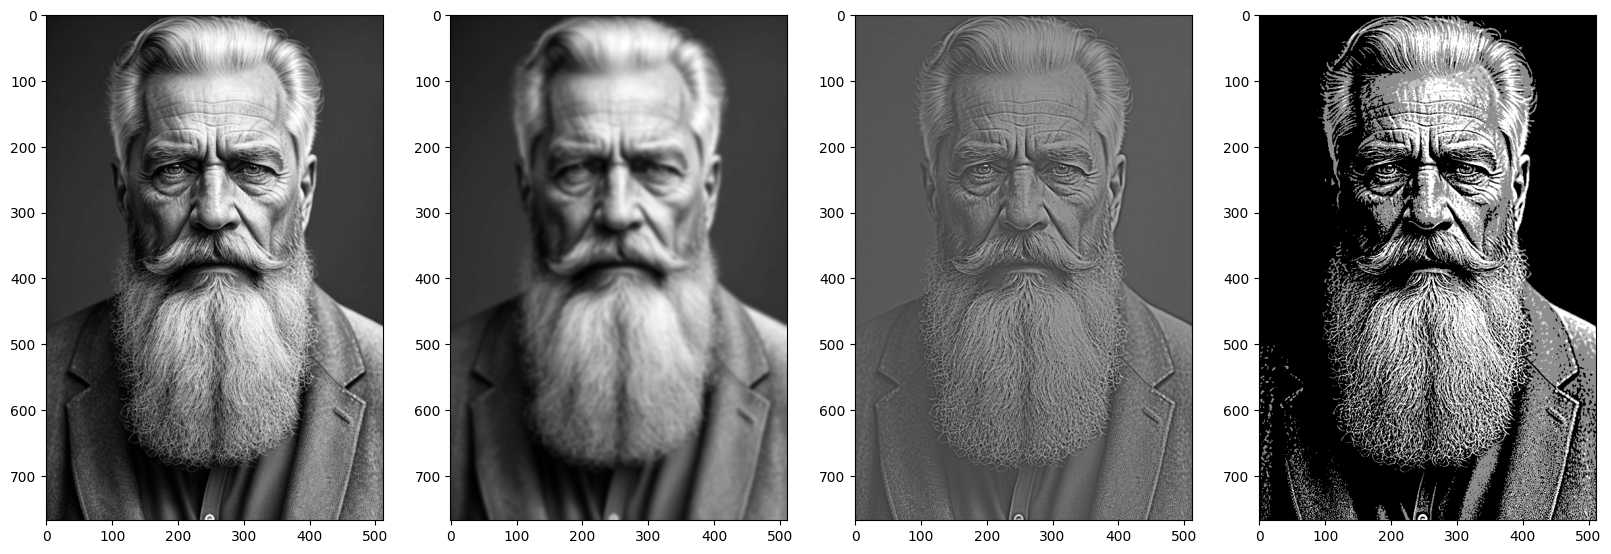

In [97]:
img = cv2.imread("/content/tess.jpeg")
img_gr = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sigma = 0.5
k=5
p=2.5
epsilon = 0.9
phi = 2.5

ib1 = cv2.GaussianBlur(img_gr,(0,0),sigma)
ib2 = cv2.GaussianBlur(img_gr,(0,0),sigma*k)
isb = ((1+p)*ib1) - p*ib2
(h,w) = isb.shape[0:2]

thresh2 = thresholding_4T(isb,epsilon, phi)
thresh2 = (np.stack((thresh2,thresh2,thresh2),axis=2)).astype(np.uint8) #stacking the channels together


fig,ax = plt.subplots(1,4,figsize=(20,15))
ax[0].imshow(ib1, cmap = 'gray')
ax[1].imshow(ib2,cmap='gray')
ax[2].imshow(isb,cmap='gray')
ax[3].imshow(thresh2)

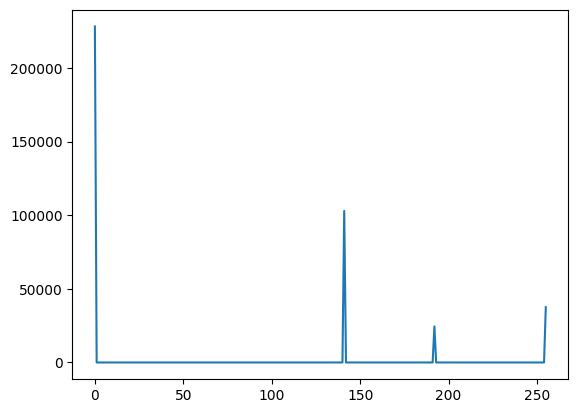

In [98]:
histr2 = cv2.calcHist([thresh2],[0],None,[256],[0,256])
plt.plot(histr2)